In [1]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from scipy.io import loadmat
from sklearn.metrics import classification_report, accuracy_score

import plotly.graph_objects as go
import PIL
import PIL.Image

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
def getFilesNewForY(basePath):
    dirs = glob(basePath+"/*/")
    print(dirs)
    #print(dirs)
    for _dir in dirs:
        files = glob(_dir+"*Scene_classification*.tiff")
        file = files[0]
        #print(files)
        yield file

In [3]:
fileNamesY = list(getFilesNewForY("/tmp/shared/dataset4"))
fileNamesY

['/tmp/shared/dataset4/16/', '/tmp/shared/dataset4/21/', '/tmp/shared/dataset4/9/', '/tmp/shared/dataset4/13/', '/tmp/shared/dataset4/5/', '/tmp/shared/dataset4/24/', '/tmp/shared/dataset4/17/', '/tmp/shared/dataset4/14/', '/tmp/shared/dataset4/11/', '/tmp/shared/dataset4/12/', '/tmp/shared/dataset4/15/', '/tmp/shared/dataset4/7/', '/tmp/shared/dataset4/23/', '/tmp/shared/dataset4/10/', '/tmp/shared/dataset4/22/', '/tmp/shared/dataset4/6/', '/tmp/shared/dataset4/4/', '/tmp/shared/dataset4/1/', '/tmp/shared/dataset4/3/', '/tmp/shared/dataset4/26/', '/tmp/shared/dataset4/8/', '/tmp/shared/dataset4/19/', '/tmp/shared/dataset4/2/', '/tmp/shared/dataset4/20/', '/tmp/shared/dataset4/25/', '/tmp/shared/dataset4/18/', '/tmp/shared/dataset4/27/']


['/tmp/shared/dataset4/16/2022-12-01-00_00_2022-12-01-23_59_Sentinel-2_L2A_Scene_classification_map.tiff',
 '/tmp/shared/dataset4/21/2022-11-09-00_00_2022-11-09-23_59_Sentinel-2_L2A_Scene_classification_map.tiff',
 '/tmp/shared/dataset4/9/2022-08-28-00_00_2022-08-28-23_59_Sentinel-2_L2A_Scene_classification_map.tiff',
 '/tmp/shared/dataset4/13/2022-08-10-00_00_2022-08-10-23_59_Sentinel-2_L2A_Scene_classification_map.tiff',
 '/tmp/shared/dataset4/5/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_Scene_classification_map.tiff',
 '/tmp/shared/dataset4/24/2022-11-09-00_00_2022-11-09-23_59_Sentinel-2_L2A_Scene_classification_map.tiff',
 '/tmp/shared/dataset4/17/2022-12-01-00_00_2022-12-01-23_59_Sentinel-2_L2A_Scene_classification_map.tiff',
 '/tmp/shared/dataset4/14/2022-08-01-00_00_2022-08-01-23_59_Sentinel-2_L2A_Scene_classification_map.tiff',
 '/tmp/shared/dataset4/11/2022-08-25-00_00_2022-08-25-23_59_Sentinel-2_L2A_Scene_classification_map.tiff',
 '/tmp/shared/dataset4/12/2022-08-25-00

In [4]:
def getFilesNew(basePath):
    dirs = glob(basePath+"/*/")
    print(dirs)
    for _dir in dirs:
        files = glob(_dir+"*B?*.tiff")
        #print(files)
        yield files

In [5]:
fileNamesX = list(getFilesNew("/tmp/shared/dataset4"))
fileNamesX

['/tmp/shared/dataset4/16/', '/tmp/shared/dataset4/21/', '/tmp/shared/dataset4/9/', '/tmp/shared/dataset4/13/', '/tmp/shared/dataset4/5/', '/tmp/shared/dataset4/24/', '/tmp/shared/dataset4/17/', '/tmp/shared/dataset4/14/', '/tmp/shared/dataset4/11/', '/tmp/shared/dataset4/12/', '/tmp/shared/dataset4/15/', '/tmp/shared/dataset4/7/', '/tmp/shared/dataset4/23/', '/tmp/shared/dataset4/10/', '/tmp/shared/dataset4/22/', '/tmp/shared/dataset4/6/', '/tmp/shared/dataset4/4/', '/tmp/shared/dataset4/1/', '/tmp/shared/dataset4/3/', '/tmp/shared/dataset4/26/', '/tmp/shared/dataset4/8/', '/tmp/shared/dataset4/19/', '/tmp/shared/dataset4/2/', '/tmp/shared/dataset4/20/', '/tmp/shared/dataset4/25/', '/tmp/shared/dataset4/18/', '/tmp/shared/dataset4/27/']


[['/tmp/shared/dataset4/16/2022-12-01-00_00_2022-12-01-23_59_Sentinel-2_L2A_B12_(Raw).tiff',
  '/tmp/shared/dataset4/16/2022-12-01-00_00_2022-12-01-23_59_Sentinel-2_L2A_B08_(Raw).tiff',
  '/tmp/shared/dataset4/16/2022-12-01-00_00_2022-12-01-23_59_Sentinel-2_L2A_B03_(Raw).tiff',
  '/tmp/shared/dataset4/16/2022-12-01-00_00_2022-12-01-23_59_Sentinel-2_L2A_B02_(Raw).tiff',
  '/tmp/shared/dataset4/16/2022-12-01-00_00_2022-12-01-23_59_Sentinel-2_L2A_B01_(Raw).tiff',
  '/tmp/shared/dataset4/16/2022-12-01-00_00_2022-12-01-23_59_Sentinel-2_L2A_B06_(Raw).tiff',
  '/tmp/shared/dataset4/16/2022-12-01-00_00_2022-12-01-23_59_Sentinel-2_L2A_B8A_(Raw).tiff',
  '/tmp/shared/dataset4/16/2022-12-01-00_00_2022-12-01-23_59_Sentinel-2_L2A_B05_(Raw).tiff',
  '/tmp/shared/dataset4/16/2022-12-01-00_00_2022-12-01-23_59_Sentinel-2_L2A_B11_(Raw).tiff',
  '/tmp/shared/dataset4/16/2022-12-01-00_00_2022-12-01-23_59_Sentinel-2_L2A_B09_(Raw).tiff',
  '/tmp/shared/dataset4/16/2022-12-01-00_00_2022-12-01-23_59_Sentinel-

In [6]:
fileNameTest = fileNamesX[0][0]
pic = PIL.Image.open(str(fileNameTest))
imageData = np.asarray(pic.getdata())
print("Min value ", np.min(imageData), " max value ", np.max(imageData))
imageData.shape

Min value  nan  max value  nan


(878787,)

In [7]:
def getFilesArrayNew(paths):
    l = []
    for i in paths:
        s = []
        for j in i:
            with rio.open(j, 'r') as f:
                ff = f.read(1)
                ff = ff[0:608, 0: 1024]
                s.append(ff)
        l.append(s)
    arr_st_new = np.stack(l)
    return  arr_st_new

In [8]:
def createImageCubes(img_array, blk_width,blk_height):
    arrray = []
    imageShape = img_array.shape
    for w in range(0,imageShape[0],blk_width):
        for h in range(0, imageShape[1], blk_height):
            arrr = img_array[w:w+blk_width,h:h+blk_height]
            arrray.append(np.asarray(arrr))
    return np.asarray(arrray)

In [9]:
def imageFromCube(cubes, imageWidth, imageHeight):
    arrrr = np.empty((imageWidth, imageHeight,12))
    cubesShape = cubes.shape
    items_per_row = int(imageWidth/cubesShape[1])
    items_per_col = int(imageHeight/cubesShape[2])
    for el in range(0,cubesShape[0]):
        num_row = int(el/items_per_col)
        num_col = int(el%items_per_col)
        #print("Row: ", num_row, " column: ", num_col)
        for i in range(0,cubesShape[1]):
            for j in range(0, cubesShape[2]):
                x = int(i+num_row*cubesShape[1])
                y = int(j+num_col*cubesShape[2])
                #print("X: ", x, " Y: ", y)
                arrrr[x,y] = cubes[el,i,j]
        #arrrr[num_row, num_col] = cubes[el,:, :, :]
        #num_col = int(int(el*cubesShape[1]%imageWidth)/imageHeight)
    return arrrr

In [13]:
filesX_array = getFilesArrayNew(fileNamesX)
#filesX_array = filesX_array / np.max(filesX_array)
#std = np.std(filesX_array)
#mean= np.mean(filesX_array)
#
#filesX_array-=mean
#filesX_array/=std

In [14]:
print("Min value: ", np.min(filesX_array), " max value: ", np.max(filesX_array))

Min value:  0.0  max value:  2.1167


In [15]:
def getFilesArrayNewY(paths):
    l = []
    for i in paths:
        with rio.open(i,'r') as f:
            r = f.read(1)
            g = f.read(2)
            b =  f.read(3)
            r = r[0:608, 0:1024]
            g = g[0:608, 0:1024]
            b = b[0:608, 0:1024]
            rgb_arr = [r, g ,b]
            l.append(rgb_arr)
            # l.append(rgb)
    return l

In [16]:
_filexY_array = np.asarray(getFilesArrayNewY(fileNamesY))
#_filexY_array = np.moveaxis(_filexY_array, 1,0)
_filexY_array = np.asarray(_filexY_array * 255).astype(int)
_filexY_array.shape

(27, 3, 608, 1024)

In [17]:
__filesY_array  = []
for i in _filexY_array:
    r = i[0]
    g = i[1]
    b = i[2]
    rgb  = r
    rgb = np.left_shift(rgb, 8) + g
    rgb = np.left_shift(rgb, 8) + b
    __filesY_array.append(rgb)

In [18]:
filexY_array = np.asarray(__filesY_array)
filexY_array.shape

(27, 608, 1024)

In [19]:
unique_valsY = np.unique(filexY_array)
print(unique_valsY)
#filexY_array[filexY_array == 1] = 100

[       0      255    40960  3092271  6566400  6605055  8421504 12632256
 16750335 16770650 16777215]


<p color="#000000"> Category 1 </p>
<p color="#0000ff"> Category 2 </p>
<p color="#00a000"> Category 3 </p>
<p color="#643200"> Category 4 </p>
<p color="#64C8FF"> Category 5 </p>
<p color="#808080"> Category 6 </p>
<p color="#C0C0C0"> Category 7 </p>
<p color="#FFE65A"> Category 8 </p>
<p color="#FFFFFF"> Category 9 </p>


In [21]:
num_of_y = filexY_array.shape[0]*filexY_array.shape[1]*filexY_array.shape[2]
cat1_c = np.count_nonzero(filexY_array == 0)
cat2_c = np.count_nonzero(filexY_array == 255)
cat3_c = np.count_nonzero(filexY_array == 40960)
cat4_c = np.count_nonzero(filexY_array == 6566400)
cat5_c = np.count_nonzero(filexY_array == 6605055)
cat6_c = np.count_nonzero(filexY_array == 8421504)
cat7_c = np.count_nonzero(filexY_array == 12632256)
cat8_c = np.count_nonzero(filexY_array == 16770650)
cat9_c = np.count_nonzero(filexY_array == 16777215)
cat_all = []
for idx, num in enumerate(unique_valsY):
    cnt = np.count_nonzero(filexY_array == num)
    print("category " + str(idx) + " count " + str(cnt))
    cat_all.append(cnt)


category 0 count 120
category 1 count 735271
category 2 count 7210430
category 3 count 46938
category 4 count 26247
category 5 count 516150
category 6 count 5110
category 7 count 118567
category 8 count 35
category 9 count 8143733
category 10 count 7383


In [22]:
for idx, i in enumerate(unique_valsY):
        filexY_array [ filexY_array == i] = idx

In [19]:
# print(np.unique(filexY_array))

In [23]:
filexY_array [ filexY_array == 3] = 0
filexY_array [ filexY_array == 4] = 0
#filexY_array [ filexY_array == 5] = 0
filexY_array [ filexY_array == 6] = 0
filexY_array [ filexY_array == 7] = 0
filexY_array [ filexY_array == 8] = 0
filexY_array [ filexY_array == 10] = 0


In [24]:
print(np.unique(filexY_array))

[0 1 2 5 9]


In [25]:
filexY_array [ filexY_array == 5] = 3
filexY_array [ filexY_array == 9] = 4


(array([ 204400.,       0.,  735271.,       0.,       0., 7210430.,
              0.,  516150.,       0., 8143733.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

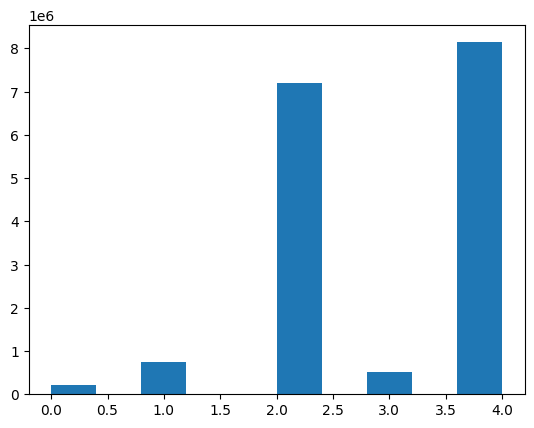

In [26]:
plt.hist(filexY_array.reshape(-1))

In [27]:
x_np = np.asarray(filesX_array)
x_np.shape

(27, 12, 608, 1024)

In [28]:
x_np2 = x_np[:,:,0:608,0:1024]
x_np2.shape

(27, 12, 608, 1024)

In [29]:
x_np2 = np.moveaxis(x_np2,1,0)
x_np2.shape

(12, 27, 608, 1024)

In [30]:
x_np_combined = x_np2.reshape(12,-1,1024)
x_np_combined.shape

(12, 16416, 1024)

In [31]:
x_np_combined.shape

(12, 16416, 1024)

In [32]:
x_np_combined = np.moveaxis(x_np_combined, 0, -1)
x_np_combined.shape

(16416, 1024, 12)

In [33]:
# x_data = x_np_combined.reshape(-1,32,32,12)
x_data = createImageCubes(x_np_combined,32,32)

In [34]:
x_data.shape

(16416, 32, 32, 12)

In [35]:
x_data_summed = np.sum(x_data, axis=3)
x_data_summed.shape

(16416, 32, 32)

In [36]:
filexY_array.shape

(27, 608, 1024)

In [37]:
y_np =  filexY_array[:,0:608,0:1024]
y_np.shape

(27, 608, 1024)

In [38]:
y_np2 = y_np.reshape(-1, 1024)
y_np2.shape

(16416, 1024)

In [39]:
# y_data = y_np2.reshape(-1, 32,32)
y_data = createImageCubes(y_np2,32,32)
y_data.shape

(16416, 32, 32)

In [40]:
#Let's import some important Libraries
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.utils import np_utils
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import pandas as pd
from keras.layers import *
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import *

In [41]:
y_cat = np_utils.to_categorical(y_data)

In [42]:
l2reg = l2(0.0002)

In [43]:
model_new = tf.keras.models.Sequential([
    #BatchNormalization(input_shape=(32,32,12)),
    Conv2D(32,3,padding='same',input_shape=(32,32,12),kernel_regularizer=l2reg),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(32,3,padding='same',kernel_regularizer=l2reg),
    BatchNormalization(),
    #Dropout(0.7),
    #BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),
    #Dropout(0.5),


    Conv2D(64,3, padding='same',kernel_regularizer=l2reg),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(64,3, padding='same',kernel_regularizer=l2reg),
    BatchNormalization(),
    #BatchNormalization(),
    Activation('relu'),
    #Dropout(0.7),
    MaxPooling2D(pool_size=(2,2),name='feature_layer'),
    #Dropout(0.5),
    #BatchNormalization(),

    #We are naming this layer, as we will extract features from it in future, JUST WAIT !!!
    Conv2D(128,3, padding='same',kernel_regularizer=l2reg),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(128,3, padding='same',kernel_regularizer=l2reg),
    BatchNormalization(),
    #Dropout(0.7),
    Activation('relu'),
    Dropout(0.7),
    # MaxPooling2D(pool_size=(2,2)),
    # Dropout(0.5),
    #BatchNormalization(),
    #Flatten(),
    # Dense(512),
    # Dense(1024),
    # Dense(2048),
    # Activation('relu'),
    # Dropout(0.7),
    # Reshape((4,4,128)),
    #Dense(64),
    # Dense(128),
    #Dense(64),
    # Dropout(0.5),
    #RandomFourierFeatures(output_dim=2048,scale=5.0,kernel_initializer="gaussian"),
    Dense(5),
    #Dense(64),
    # Dense(128),
    # Dropout(0.5),
    #BatchNormalization(),
    #Activation('relu'),
    #Dense(256),
    #Dense(128),
    #Activation('relu'),
    #Dropout(0.7),
    #Reshape((8,8)),
    # UpSampling2D((2,2)),
    Conv2D(128,3, padding='same',kernel_regularizer=l2reg),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(128,3, padding='same',kernel_regularizer=l2reg),
    BatchNormalization(),
    #Dropout(0.7),
    Activation('relu'),
    Dropout(0.7),
    UpSampling2D((2,2)),
    #Dropout(0.5),
    #BatchNormalization(),
    Conv2D(64,3, padding='same',kernel_regularizer=l2reg),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(64,3, padding='same',kernel_regularizer=l2reg),
    BatchNormalization(),
    #BatchNormalization(),
    Activation('relu'),
    #Dropout(0.7),
    UpSampling2D((2,2)),
    #Dropout(0.5),
    #BatchNormalization(),
    Conv2D(32,3, padding='same',kernel_regularizer=l2reg),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(32,3, padding='same',kernel_regularizer=l2reg),
    BatchNormalization(),
    Activation('relu'),
    #Dropout(0.7),
    #BatchNormalization(),
    #Conv2D(32,3, padding='same'),
    Activation('relu'),
    Conv2D(5,3,padding='same',kernel_regularizer=l2reg),
    BatchNormalization(),
    #Activation('relu'),
    #Dropout(0.6),
    #BatchNormalization(),
    # model.add(Flatten())
    # model.add(Dense(24))
    # model.add(Activation('relu'))
    # model.add(Dropout(0.5))
    # model.add(Dense(6))
    Activation('softmax'),
])

2023-06-06 21:00:13.582580: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-06 21:00:13.631977: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-06 21:00:13.632517: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-06 21:00:13.641653: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

In [44]:
model_new.compile(loss="sparse_categorical_crossentropy",optimizer='rmsprop',metrics=['accuracy'])

In [45]:
model_new.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        3488      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0

In [46]:
es = EarlyStopping(monitor='val_loss')
mc = ModelCheckpoint('best_model_new_2.h5', monitor='val_loss')
cb = [es,mc]

In [47]:
history2 = model_new.fit(x_data, y_data, epochs=100,batch_size=512, validation_split=0.2)

Epoch 1/100


2023-06-06 21:01:05.127172: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500
2023-06-06 21:01:39.592405: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


26/26 [==============================] - 64s 126ms/step - loss: 1.5211 - accuracy: 0.5479 - val_loss: 1.6623 - val_accuracy: 0.5729
Epoch 2/100
26/26 [==============================] - 2s 60ms/step - loss: 1.0489 - accuracy: 0.8272 - val_loss: 1.5737 - val_accuracy: 0.6171
Epoch 3/100
26/26 [==============================] - 2s 80ms/step - loss: 0.9251 - accuracy: 0.8620 - val_loss: 1.5009 - val_accuracy: 0.5958
Epoch 4/100
26/26 [==============================] - 2s 60ms/step - loss: 0.8596 - accuracy: 0.8739 - val_loss: 1.8860 - val_accuracy: 0.5178
Epoch 5/100
26/26 [==============================] - 2s 60ms/step - loss: 0.7985 - accuracy: 0.8840 - val_loss: 1.6679 - val_accuracy: 0.5248
Epoch 6/100
26/26 [==============================] - 2s 60ms/step - loss: 0.7557 - accuracy: 0.8887 - val_loss: 1.5919 - val_accuracy: 0.5303
Epoch 7/100
26/26 [==============================] - 2s 60ms/step - loss: 0.7218 - accuracy: 0.8900 - val_loss: 1.6630 - val_accuracy: 0.5241
Epoch 8/100
26/2

In [192]:
model_new.save("/tmp/shared/model3_3_81.h5")

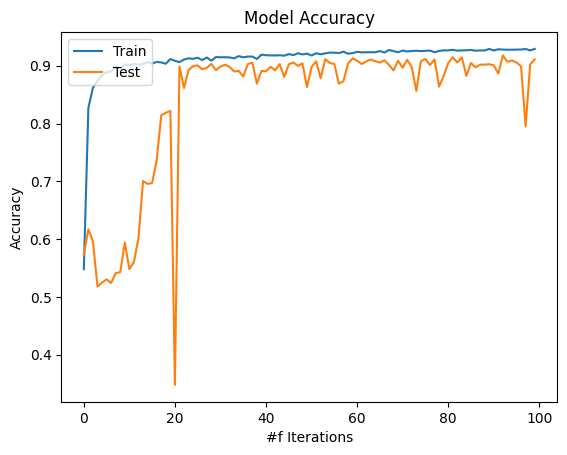

In [48]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('#f Iterations')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

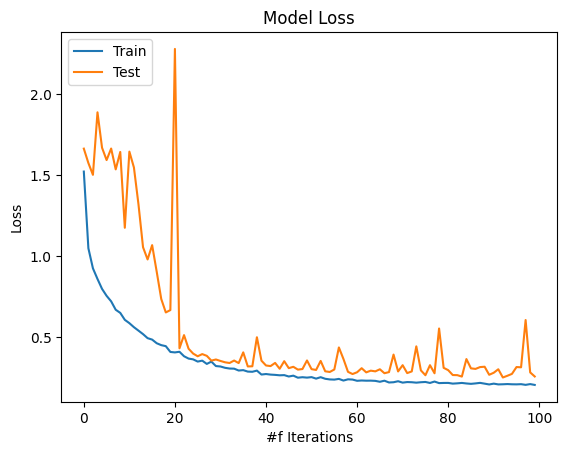

In [49]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('#f Iterations')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Check

In [49]:
from glob import glob
S_sentinel_bands = glob("/tmp/shared/test_images2/*B?*.tiff")
S_sentinel_bands.sort()
S_sentinel_bands

['/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B01_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B02_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B03_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B04_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B05_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B06_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B07_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B08_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B09_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B11_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-

In [50]:
l = []
for i in S_sentinel_bands:
  with rio.open(i, 'r') as f:
    l.append(f.read(1))

In [51]:
l.shape

AttributeError: 'list' object has no attribute 'shape'

In [52]:
arr_st = np.stack(l)
# std2 = np.std(arr_st)
# mean2= np.mean(arr_st)
#
# arr_st-=mean2
# arr_st/=std2
#arr_st = arr_st / np.max(filesX_array)

In [53]:
arr_st.shape

(12, 733, 1250)

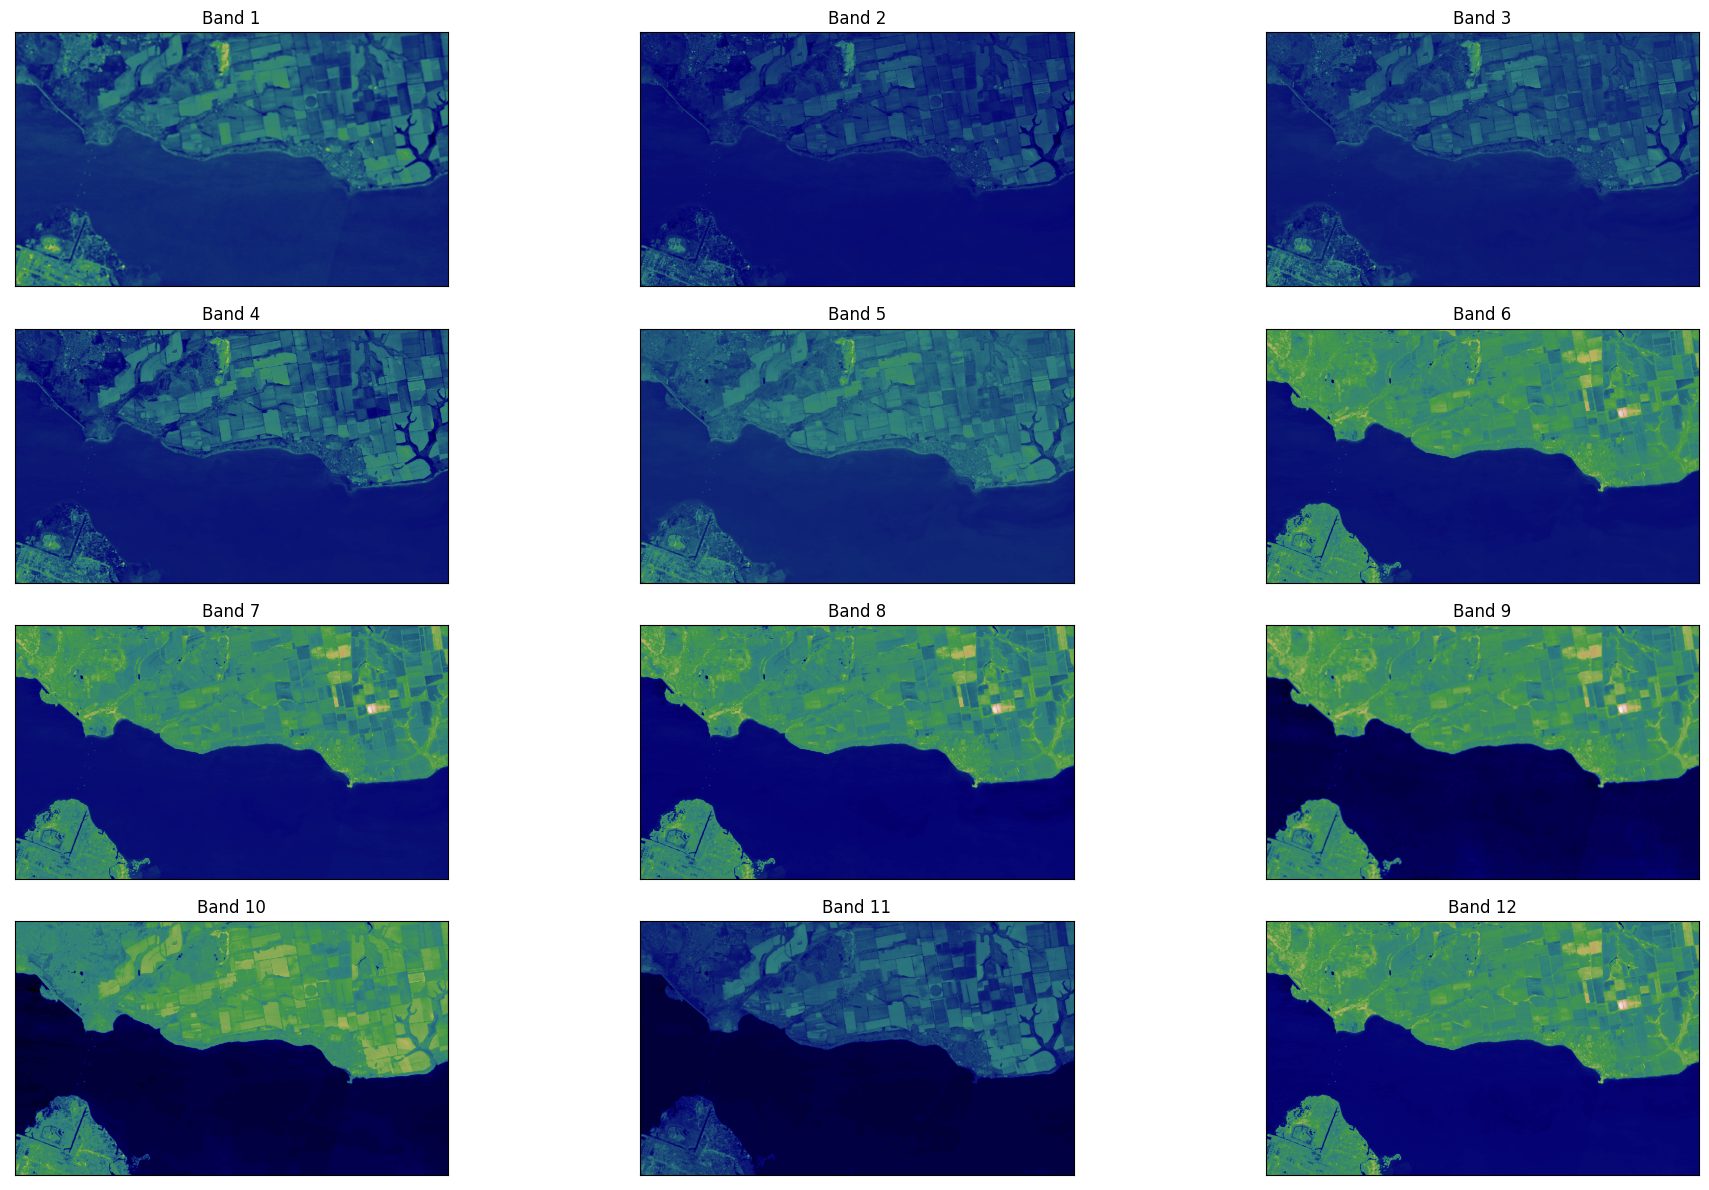

In [54]:
ep.plot_bands(arr_st, cmap = 'gist_earth', figsize = (20, 12), cols = 3, cbar = False)
plt.show()

In [55]:
print("Min " , np.min(arr_st), " and max ", np.max(arr_st))

Min  0.0014  and max  1.366


In [56]:
x = np.moveaxis(arr_st, 0, -1)
x.shape

(733, 1250, 12)

In [57]:
x1_v = x.shape[0]%32
x1_h = x.shape[1]%32
res1 = x.shape[0]-x1_v
res2 = x.shape[1]-x1_h
xx = x[0:608,0:1024,:]

In [58]:
x_rr = createImageCubes(xx,32,32)

In [59]:
x_r_new = x_np[4]
x_r_new = x_r_new[:,0:608,0:1024]
x_r_new2 = np.moveaxis(x_r_new, 0, -1)
print("Shape of array: ", x_r_new2.shape)
#x_r_new2 = x_r_new.reshape(-1, 32,32,12)
x_r_new3 = createImageCubes(x_r_new2,32,32)
x_r_new3.shape
print("Value: ", x_r_new2[63,0,0], " and splitted ", x_r_new3[0,31,31,0])

Shape of array:  (608, 1024, 12)
Value:  0.0221  and splitted  0.0195


In [60]:
x_r_testt3 = x_r_new3[607,:,:,1]
x_r_testt3.shape
# ep.plot_bands(x_r_testt3,
#               cmap=ListedColormap(['black', 'purple','blue', 'orange']))
# print("Transformed value: ",x_r_new2[0,0,0,0],"and original", x_r_new[1,0,0] )

(32, 32)

In [61]:
x_r_test4 = imageFromCube(x_r_new3, 608, 1024)
x_r_test4.shape

(608, 1024, 12)

In [62]:
x_r_ttest = x_r_new[1]
x_r_ttest.shape

(608, 1024)

In [63]:
# ep.plot_bands(x_r_test4[:,:,1],
#               cmap=ListedColormap(['black', 'purple','blue', 'orange']))

In [64]:
# ep.plot_bands(x_r_new2[:,:,1],
#               cmap=ListedColormap(['black', 'purple','blue', 'orange']))

In [65]:
x_r_ttest2 = x_r_new2
x_r_ttest2 = x_r_ttest2[:,:,:,1]
x_r_ttest2 = x_r_ttest2.reshape(608,1024)

IndexError: too many indices for array: array is 3-dimensional, but 4 were indexed

In [62]:
# ep.plot_bands(x_r_ttest2,
#               cmap=ListedColormap(['black', 'purple','blue', 'orange']))

In [104]:
prediction = model_new.predict(x_r_new3,batch_size=32)

19/19 [==============================] - 1s 23ms/step


In [105]:
print("Min percentage: ", np.min(prediction), " max percentage: ", np.max(prediction), " shape: ", prediction.shape)

Min percentage:  2.2936501e-07  max percentage:  0.9998679  shape:  (608, 32, 32, 5)


In [106]:
pred_cat = np.argmax(prediction,axis=-1)
pred_cat.shape

(608, 32, 32)

In [107]:
pp = np.expand_dims(pred_cat, axis=-1)

In [108]:
# pred_pxl = pred_cat.reshape(608,1024)
pred_pxl = imageFromCube(pred_cat,608,1024)

In [109]:
pred_pxl.shape

(608, 1024, 12)

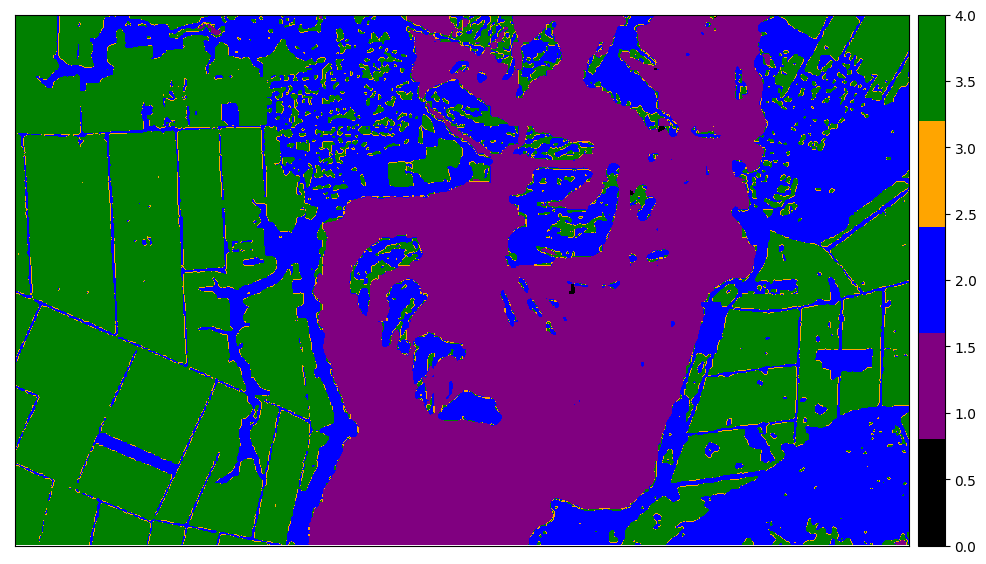

<AxesSubplot:>

In [110]:
ep.plot_bands(pred_pxl[:,:,0],
              cmap=ListedColormap(['black', 'purple','blue', 'orange','green']))

In [73]:
Check_images = glob("/tmp/shared/test_images2/*Scen*.tiff")
Check_images

['/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_Scene_classification_map.tiff']

In [76]:
item = y_np[4]
item.shape

(608, 1024)

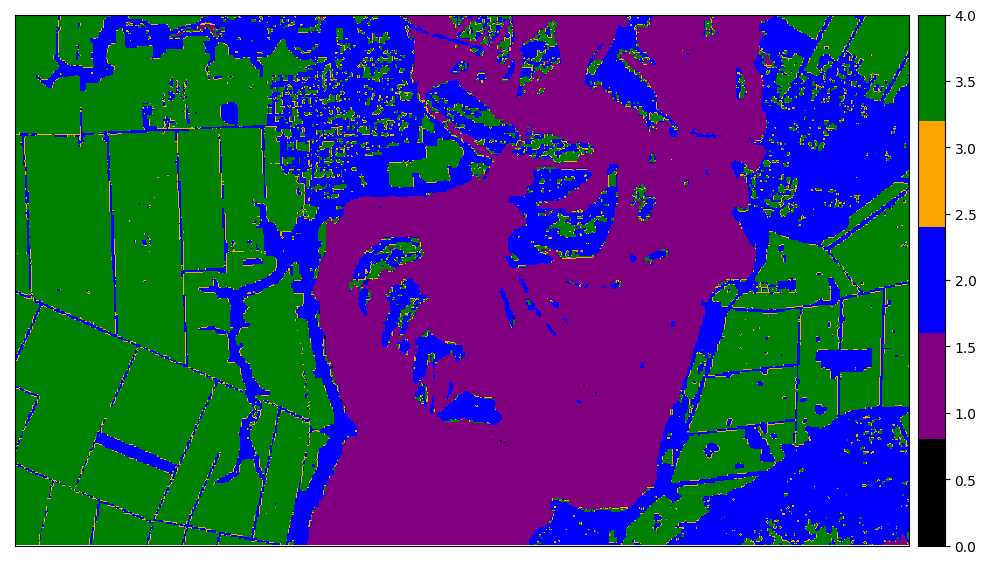

<AxesSubplot:>

In [77]:
ep.plot_bands(item,
              cmap=ListedColormap(['black', 'purple','blue', 'orange','green']))

In [78]:
accuracy_score(pred_pxl[:,:,0].reshape(-1), item.reshape(-1))

NameError: name 'pred_pxl' is not defined

(array([6.10000e+01, 0.00000e+00, 1.99572e+05, 0.00000e+00, 0.00000e+00,
        1.65659e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.57300e+05]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

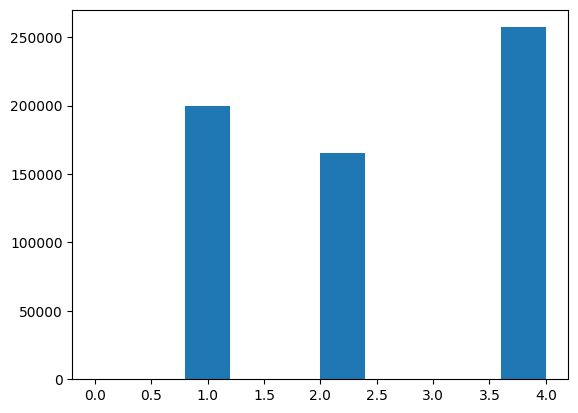

In [79]:
plt.hist(item.reshape(-1))

(array([6116.,    0.,    0., 5578.,    0.,    0.,    0.,    0.,    0.,
        7762.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

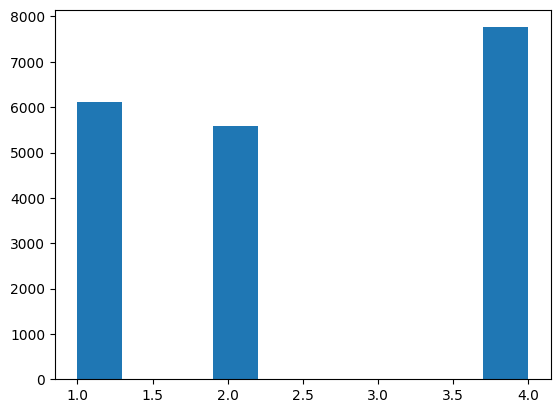

In [109]:
plt.hist(pred_cat[:,:,0].reshape(-1))

In [111]:
prediction_test = model_new.predict(x_rr,batch_size=32)

19/19 [==============================] - 0s 23ms/step


In [112]:
pred_cat_test = np.argmax(prediction_test,axis=-1)

In [113]:
pred_pxl_test = imageFromCube(pred_cat_test, 608,1024)

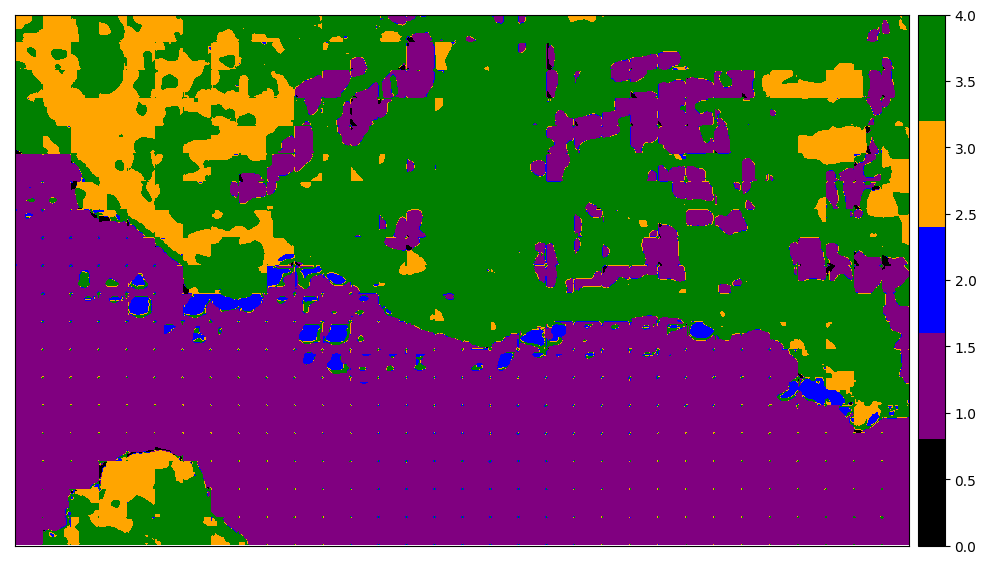

<AxesSubplot:>

In [114]:
ep.plot_bands(pred_pxl_test[:,:,0],
              cmap=ListedColormap(['black', 'purple','blue', 'orange','green']))

In [74]:
_test_y_array = np.asarray(getFilesArrayNewY(Check_images))
#_filexY_array = np.moveaxis(_filexY_array, 1,0)
_test_y_array = np.asarray(_test_y_array * 255).astype(int)

In [75]:
__test_y_array  = []
for i in _test_y_array:
    r = i[0]
    g = i[1]
    b = i[2]
    rgb  = r
    rgb = np.left_shift(rgb, 8) + g
    rgb = np.left_shift(rgb, 8) + b
    __test_y_array.append(rgb)

In [76]:
test_y_array = np.asarray(__test_y_array)

In [77]:
test_unique_valsY = np.unique(test_y_array)
print(test_unique_valsY)

[     255    40960  3092271  8421504 12632256 16770650]


In [78]:
test_y_array [test_y_array == 255] = 1
test_y_array [test_y_array == 3092271] = 3
test_y_array [test_y_array == 12632256] = 7
test_y_array [test_y_array == 40960] = 2
test_y_array [test_y_array == 6605055] = 5
test_y_array [test_y_array == 8421504] = 6
test_y_array [test_y_array == 16770650] = 9
test_y_array [test_y_array == 16777215] = 10

test_y_array [ test_y_array == 3] = 0
test_y_array [ test_y_array == 4] = 0
#filexY_array [ filexY_array == 5] = 0
test_y_array [ test_y_array == 6] = 0
test_y_array [ test_y_array == 7] = 0
test_y_array [ test_y_array == 8] = 0
test_y_array [ test_y_array == 10] = 0

test_y_array [ test_y_array == 5] = 3
test_y_array [ test_y_array == 9] = 4

# for idx, i in enumerate(test_unique_valsY):
#         test_y_array [ test_y_array == i] = idx

In [79]:
print(np.unique(test_y_array))

[0 1 2 4]


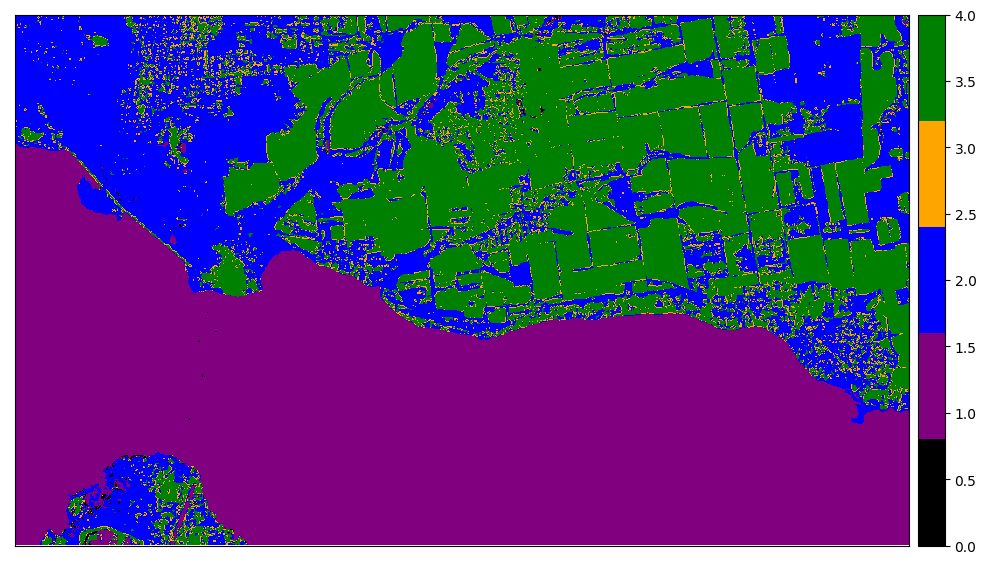

<AxesSubplot:>

In [80]:
ep.plot_bands(test_y_array,
              cmap=ListedColormap(['black', 'purple','blue', 'orange','green']))

In [115]:
accuracy_score(pred_pxl_test[:,:,0].reshape(-1), test_y_array.reshape(-1))

0.616589997944079

In [135]:
print(classification_report(pred_pxl_test[:,:,0].reshape(-1),test_y_array.reshape(-1)))

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.07      0.01      0.02      5726
         1.0       0.94      1.00      0.97    259053
         2.0       0.00      0.99      0.00       150
         3.0       0.00      0.00      0.00     99213
         4.0       0.96      0.67      0.79    258450

    accuracy                           0.69    622592
   macro avg       0.40      0.53      0.36    622592
weighted avg       0.79      0.69      0.73    622592



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([271792.,      0.,      0.,  62752.,      0.,      0., 170364.,
             0.,      0., 117684.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

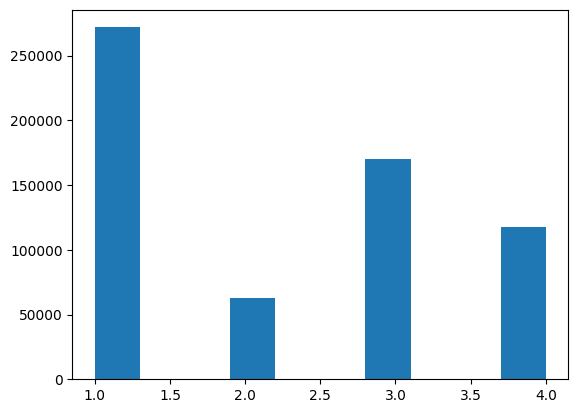

In [114]:
plt.hist(pred_pxl_test[:,:,0].reshape(-1))

(array([  1027.,      0., 274825.,      0.,      0., 167188.,      0.,
             0.,      0., 179552.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

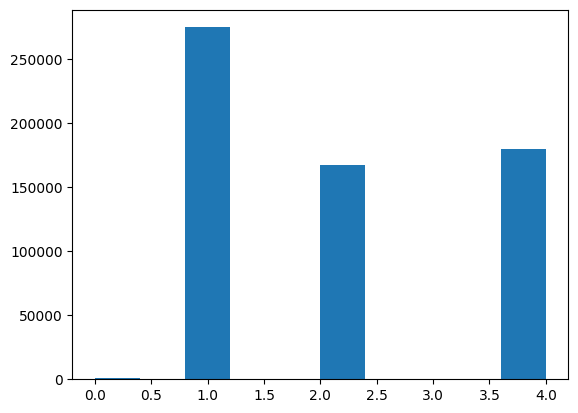

In [115]:
plt.hist(test_y_array.reshape(-1))

## Pretrainded model

In [69]:
model80 = tf.keras.models.load_model("/tmp/shared/model3_2_81.h5")

In [70]:
predictdata_test = model80.predict(x_rr, batch_size=32)

2023-01-14 12:14:22.055717: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500


19/19 [==============================] - 5s 5ms/step


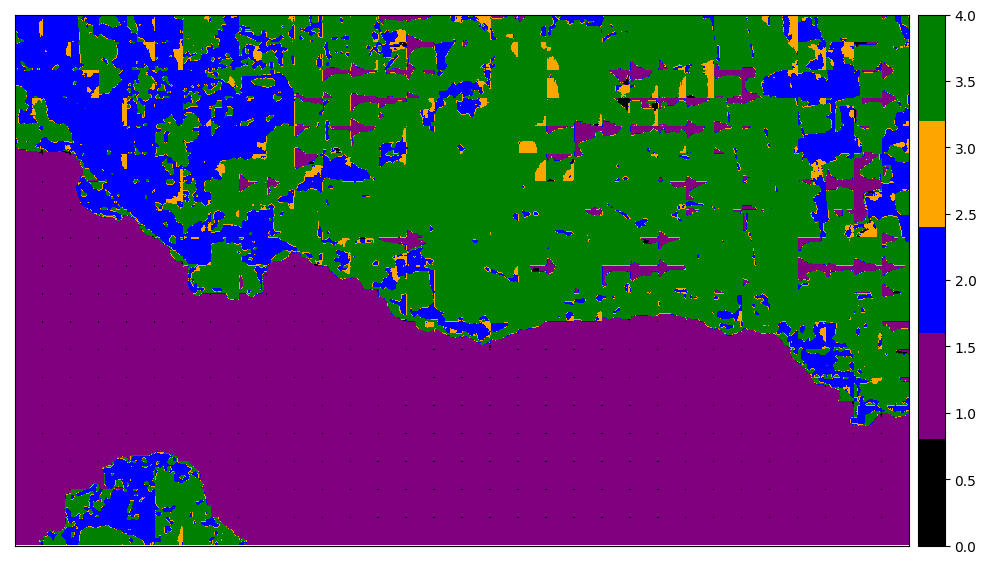

<AxesSubplot:>

In [71]:
pred_cat_test_trained = np.argmax(predictdata_test, axis=-1)
pred_pxl_test_trained = imageFromCube(pred_cat_test_trained, 608, 1024)
ep.plot_bands(pred_pxl_test_trained[:, :, 0],
              cmap=ListedColormap(['black', 'purple', 'blue', 'orange', 'green']))

In [81]:
accuracy_score(pred_pxl_test_trained[:,:,0].reshape(-1), test_y_array.reshape(-1))

0.8162247507195723

In [82]:
print(classification_report(pred_pxl_test_trained[:,:,0].reshape(-1),test_y_array.reshape(-1)))

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       997
         1.0       0.98      0.95      0.96    284764
         2.0       0.49      0.95      0.64     85240
         3.0       0.00      0.00      0.00      9699
         4.0       0.88      0.65      0.75    241892

    accuracy                           0.82    622592
   macro avg       0.47      0.51      0.47    622592
weighted avg       0.86      0.82      0.82    622592



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([   997.,      0., 284764.,      0.,      0.,  85240.,      0.,
          9699.,      0., 241892.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

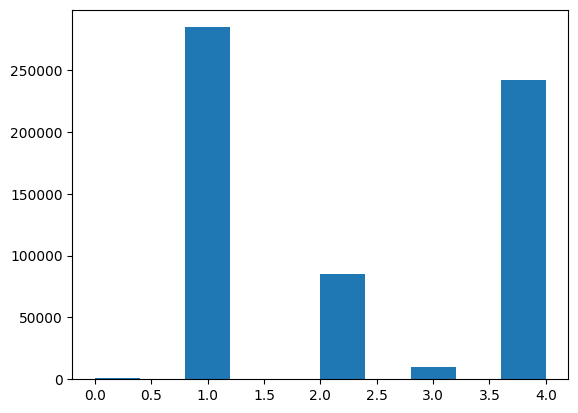

In [83]:
plt.hist(pred_pxl_test_trained[:,:,0].reshape(-1))